## Task is to compare the following weights initalization and see the final results

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import sklearn.datasets
import math

In [2]:
from nn_util import *

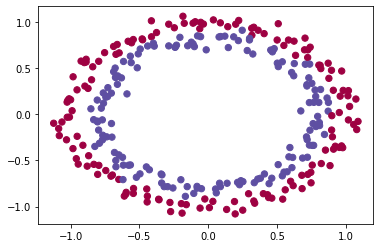

In [3]:
def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

train_X, train_Y, test_X, test_Y = load_dataset()

## NN model 

We will compare following different initialziation methods : 

1. zero initalization -- zeros in input argument
2. Random initalization -- random values to weights (large values)
3. He initalization -- given by research paper He et al. ,2015

In [4]:
def initalize_params_with_zeros(layers_dims): 
    
    params ={}
    L = len(layers_dims)
    
    for l in range(1,L):
        params['w' + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        params['b' + str(l)] = np.zeros((layers_dims[l],1))
    return params

In [47]:
def initialize_params_with_random(layers_dims) :

    '''
    Initializing the weights to random values, we will scale it by *10 
    Initializing the biases to zeros
    '''
    
    params = {}
    L = len(layers_dims)
    
    for l in range(1,L): 
        params['w' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*10
        params['b' + str(l)] = np.zeros((layers_dims[l],1))
        
    return params
    

In [48]:
def initialize_params_with_he(layers_dims) : 
    
    '''
    He initialization -> here we assign weights again to random values and biases to zeros but
                         now we multiply them by math.sqrt(2/dims of prev_layer) instead by 10
    '''
    
    params = {}
    L = len(layers_dims)
    
    for l in range(1,L) :
        params['w' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * math.sqrt(2/layers_dims[l-1])
        params['b' + str(l)] = np.zeros((layers_dims[l],1)) * math.sqrt(2/layers_dims[l-1])
        
    return params


In [49]:
def model(X,Y,learning_rate=0.01,num_iterations = 15000,print_cost = True,initalization = 'he'):
    
    grads = {}
    costs = []
    
    m = X.shape[1]
    layers_dims = [X.shape[0],10,5,1]
    
    # Initializing parameters
    if initalization == 'zero' : 
        params = initalize_params_with_zeros(layers_dims)
    if initalization == 'random' :
        params = initialize_params_with_random(layers_dims)
    if initalization == 'he' : 
        params = initialize_params_with_he(layers_dims)
    
    # gradient descent
    for i in range(0,num_iterations) : 
        
        # Forward prop 
        a3,cache = forward_prop(X,params)
        
        # Computing cost
        cost = compute_cost(a3,Y)
        
        # Backward Prop
        grads = backward_prop(X,Y,cache)
        
        # Updating parameters
        params = update_parameters(params,grads,learning_rate)
        
        if print_cost and i%1000 == 0 :
            print("Cost after iteration {} : {} ".format(i,cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iteration per 1000')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    
    return params
        

## Zeros initialization

In [34]:
# initalize with zeros
params = initalize_params_with_zeros([3,2,1])

Cost after iteration 0 : 0.6931471805599453 
Cost after iteration 1000 : 0.6931471805599453 
Cost after iteration 2000 : 0.6931471805599453 
Cost after iteration 3000 : 0.6931471805599453 
Cost after iteration 4000 : 0.6931471805599453 
Cost after iteration 5000 : 0.6931471805599453 
Cost after iteration 6000 : 0.6931471805599453 
Cost after iteration 7000 : 0.6931471805599453 
Cost after iteration 8000 : 0.6931471805599453 
Cost after iteration 9000 : 0.6931471805599453 
Cost after iteration 10000 : 0.6931471805599455 
Cost after iteration 11000 : 0.6931471805599453 
Cost after iteration 12000 : 0.6931471805599453 
Cost after iteration 13000 : 0.6931471805599453 
Cost after iteration 14000 : 0.6931471805599453 


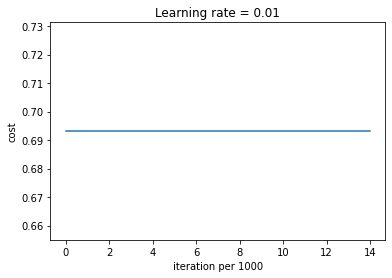

In [35]:
params  = model(train_X,train_Y,initalization='zero')

In [36]:
print("train set : ")
predictions_train = predict(train_X,train_Y,params)
print("test set : ")
predictions_test = predict(test_X,test_Y,params)


train set : 
Accuracy: 0.5
test set : 
Accuracy: 0.5


In [37]:
print("train_preds = " + str(predictions_train))
print("test_preds = " + str(predictions_test))

train_preds = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
test_preds = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


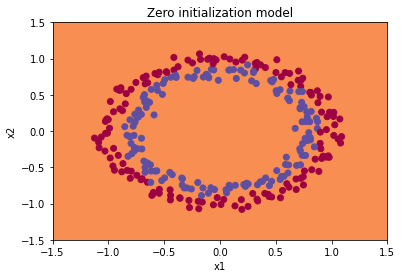

In [38]:
plt.title("Zero initialization model")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x : predict_dec(params,x.T),train_X,train_Y)

The model with zeros as weights and biases initially is predicting 0 for each example, thus the neurons in each layer are learning the same thing and this is same as a linear classifier

# Random Initialization

In [39]:
# initalization with random values of weights scaled to 10 times
params = initialize_params_with_random([3,2,1])

/home/ape/Deep learning stuff/deeplearning.ai implementation/improving neural networks/nn_util.py:10: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))
/home/ape/Deep learning stuff/deeplearning.ai implementation/improving neural networks/nn_util.py:78: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/home/ape/Deep learning stuff/deeplearning.ai implementation/improving neural networks/nn_util.py:78: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0 : inf 
Cost after iteration 1000 : 0.431560173256115 
Cost after iteration 2000 : 0.38892045699998407 
Cost after iteration 3000 : 0.3449261436944912 
Cost after iteration 4000 : 0.318842400478574 
Cost after iteration 5000 : 0.3022112219713867 
Cost after iteration 6000 : 0.2911011069096564 
Cost after iteration 7000 : 0.28353351149942063 
Cost after iteration 8000 : 0.27889822576676676 
Cost after iteration 9000 : 0.2755890372224489 
Cost after iteration 10000 : 0.2733054620611689 
Cost after iteration 11000 : 0.2719386623299194 
Cost after iteration 12000 : 0.27106863274087695 
Cost after iteration 13000 : 0.27043208269567226 
Cost after iteration 14000 : 0.27007588957782336 


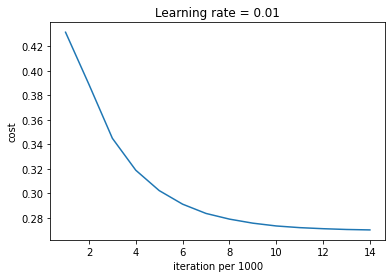

In [40]:
params = model(train_X,train_Y,initalization='random')

In [41]:
print('train set :')
predictions_train = predict(train_X,train_Y,params)
predictions_test = predict(test_X,test_Y,params)

train set :
Accuracy: 0.8433333333333334
Accuracy: 0.81


In [42]:
print(predictions_train)
print(predictions_test)

[[1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1
  1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1
  0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
  1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1
  0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
[[1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
  0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0]]


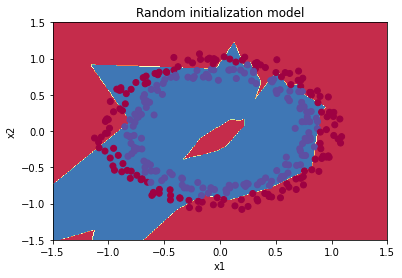

In [43]:
plt.title("Random initialization model")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x : predict_dec(params,x.T),train_X,train_Y)

As you can see from the cost plot, cost starts high due to large random values but gradually decreases and at end it gets stagnant, as the random initalization gives us (upto some extent) problem of Vanishing/Exploding gradients
thus slowing down optimization algorithm

If we would have initialized weights to small random values, i.e between the layer's dims (not scaling by 10) we would have got better results

## He initialization

In [44]:
params = initialize_params_with_random([3,2,1])

Cost after iteration 0 : 0.7468382661247143 
Cost after iteration 1000 : 0.649792565436279 
Cost after iteration 2000 : 0.6017432408428404 
Cost after iteration 3000 : 0.5263020258582003 
Cost after iteration 4000 : 0.42197095913124016 
Cost after iteration 5000 : 0.31386145522816555 
Cost after iteration 6000 : 0.23318120086246893 
Cost after iteration 7000 : 0.17726149386703227 
Cost after iteration 8000 : 0.1391417900097982 
Cost after iteration 9000 : 0.11361655650044493 
Cost after iteration 10000 : 0.09722954210691884 
Cost after iteration 11000 : 0.08593756885244999 
Cost after iteration 12000 : 0.07777753104852088 
Cost after iteration 13000 : 0.07161872768205409 
Cost after iteration 14000 : 0.06689769926280216 


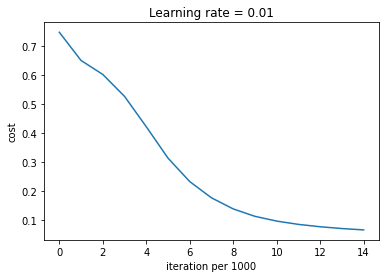

In [50]:
params = model(train_X,train_Y,initalization='he')

In [51]:
print('train set : ')
predictions_train = predict(train_X,train_Y,params)
print('test set : ')
predictions_test = predict(test_X,test_Y,params)

train set : 
Accuracy: 0.9866666666666667
test set : 
Accuracy: 0.94


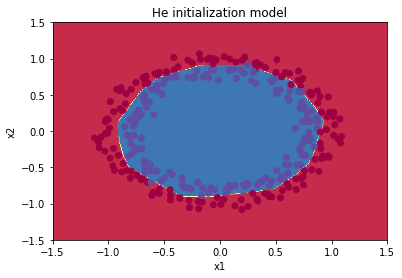

In [52]:
plt.title("He initialization model")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x : predict_dec(params,x.T),train_X,train_Y)

The model with He initialization differentiates the red and blue dots very well even with small num of iterations

# Conclusion : 

| **Model**                                   | **Train accuracy** | **Problem/Comment**     |
|---------------------------------------------|--------------------|-------------------------|
| 3-layer NN with zeros initialization        | 50%                | fails to break symmetry |
| 3-layer NN with large random initialization | 84%                | too large weights       |
| 3-layer NN with He initialization           | 98.6%              | perfect                 |